## Customer Churn Prediction

### Business understanding
    Project scenario: 
    In today's world of machine learning, most companies build classification models to perform churn analysis on their customers.We have been tasked to create a prediction model for a telecommunication company to help predict id a customer will churn or not. We are to also help them uderstand their data and know what factors affect the rate at which customers stop using their network to understand their data.

    Goal:
     To build a classification model to predict customer churn

    Null hypothesis :
    1. There is a dominant attribute that affects churn
    2. The customer is not likely to churn

    Alternative hypothesis:
    1. There is no dominant attribute that affects churn
    2. The customer is likely to churn

   ### Analytical questions
 
    1.What is the total churn rate?
    2.How does the different boolean attributes affect the churn?
    3.How does the different non-boolean attributes affect the churn?
    4.How does the different numerical attributes affect the churn?
    5. How does tenure affect the churn?
    6.How does the type of internet service affect churn?
    7.How does the type of contract affect the churn?
    8.How does the type of payment method affect the churn?



    #### To do list
    #create two columns for internet service; boolean and non boolean
    #group column for contracts
    #group payment method
    #convert churn col to boolean

    NOTE
    #Do not group during cleaning

    




## Data Understanding

In [718]:
#importing packages
import pyodbc 
#import the dotenv_values function from the dotenv package    
from dotenv import dotenv_values 
import pandas as pd
import warnings 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [719]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [720]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")


In [721]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [722]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [723]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [724]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [725]:
#checking a few rows of the data
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [726]:
#checking for nulls
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

###### Observations
-There are 269 nulls on multiplelines, 651 on onlinesecurity, 651 on online backup, 1 on churn

In [727]:
#checking info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [728]:
#checking for duplicates
data.duplicated().sum()

0

In [729]:
#checking the shape of the data
data.shape

(3000, 21)

###### Observarions
There are 3000 rows and 21 columns on data

In [730]:
#loading and viewing the second data
df2 = pd.read_csv ('./Data/LP2_Telco-churn-second-2000.csv')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [731]:
#checking for nulls
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [732]:
#checking info of the df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [733]:
#checking for duplicates
df2.duplicated().sum()

0

In [734]:
#checking the shape of the data
df2.shape

(2043, 21)

##### Concatenating the data 

In [735]:


# Assuming df and df2 are your two DataFrames
train_data = pd.concat([data, df2], ignore_index=True)
train_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [736]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [737]:
train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

### cleaning the train data

In [738]:
# convert boolean columns to object Dtypes

bool_to_obj = {'Partner': object,
               'SeniorCitizen': object,
               'Dependents': object, 
               'PhoneService': object,
               'PaperlessBilling': object}

train_data = train_data.astype(bool_to_obj)

In [739]:
def replace_true_false_with_yes_no(df):
    """
    Replace True and False values with Yes and No in Object columns of the DataFrame.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing columns with True and False values to be replaced.

    Returns:
    - None. Modifies the DataFrame in place.
    """
    object_columns = df.select_dtypes(include='object').columns
    replace_values = {True: 'Yes', False: 'No'}
    
    for column in object_columns:
        df[column] = df[column].replace(replace_values)

# Example usage:
# Assuming 'data1' is your DataFrame
replace_true_false_with_yes_no(train_data)
train_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [740]:
# Convert 'TotalCharges' column to numerical type (if not already)
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')

In [741]:
# Drop Customer ID column

train_data.drop(columns='customerID', inplace=True)
train_data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [742]:
# Drop rows where tenure = 0
train_data.drop(labels=train_data[train_data['tenure'] == 0].index, axis=0, inplace=True)

In [743]:
# Replace 'No' values with 0 and 'Yes' values with 1 for senior citizen
train_data['SeniorCitizen'] = train_data['SeniorCitizen'].replace({'No': 0, 'Yes': 1})

In [744]:
# Drop missing value in the Churn column

train_data.dropna(subset='Churn', inplace=True)

In [745]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   int64  
 2   Partner           5034 non-null   object 
 3   Dependents        5034 non-null   object 
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   object 
 6   MultipleLines     4767 non-null   object 
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    4385 non-null   object 
 9   OnlineBackup      4385 non-null   object 
 10  DeviceProtection  4385 non-null   object 
 11  TechSupport       4385 non-null   object 
 12  StreamingTV       4385 non-null   object 
 13  StreamingMovies   4385 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null   object 
 17  

In [746]:
train_data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       267
InternetService       0
OnlineSecurity      649
OnlineBackup        649
DeviceProtection    649
TechSupport         649
StreamingTV         649
StreamingMovies     649
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [747]:
train_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [748]:
# replace the remaining missing values with the mode of their respective columns

columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies']

for column in columns_to_replace:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    

In [749]:
train_data['SeniorCitizen'] = train_data['SeniorCitizen'].astype('object')

In [750]:
#check for any nulls after cleaning
train_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### My data is now clean. I can proceed to EDA

#### Exploratory Data Analysis

In [751]:
#descriptive statistics of train data
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5034.0,32.620580,24.511015,1.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5034.0,65.107251,30.068019,18.400000,35.799999,70.599998,90.050003,118.650002
TotalCharges,5034.0,2300.954758,2268.346402,18.799999,417.662498,1401.000000,3860.599976,8670.100000


In [752]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   object 
 2   Partner           5034 non-null   object 
 3   Dependents        5034 non-null   object 
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   object 
 6   MultipleLines     5034 non-null   object 
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null   object 
 17  

##### Univariate analysis

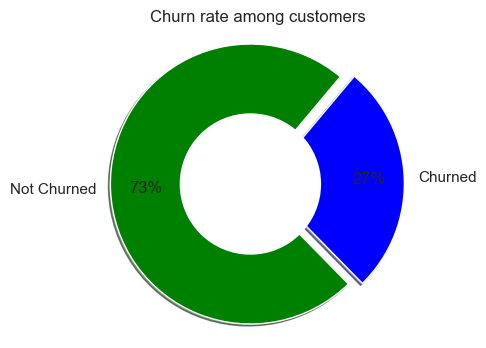

In [753]:
# visualizing the independent variable churn column
churn_data = train_data['Churn'].value_counts()
# Create a pie chart using pyplot to visulaize churn rate
plt.figure(figsize=(4, 4))
plt.pie(churn_data, labels=['Not Churned','Churned'], colors=['green','Blue'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()

--- tenure ---
Summary Statistics:
count    5034.000000
mean       32.620580
std        24.511015
min         1.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


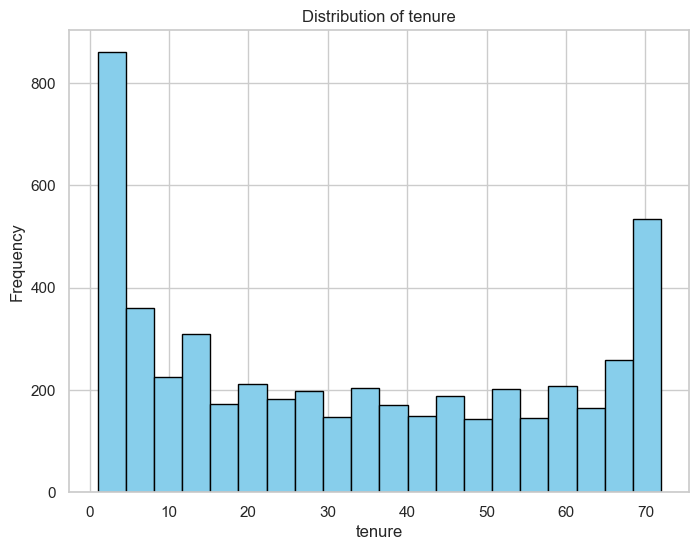

--- MonthlyCharges ---
Summary Statistics:
count    5034.000000
mean       65.107251
std        30.068019
min        18.400000
25%        35.799999
50%        70.599998
75%        90.050003
max       118.650002
Name: MonthlyCharges, dtype: float64


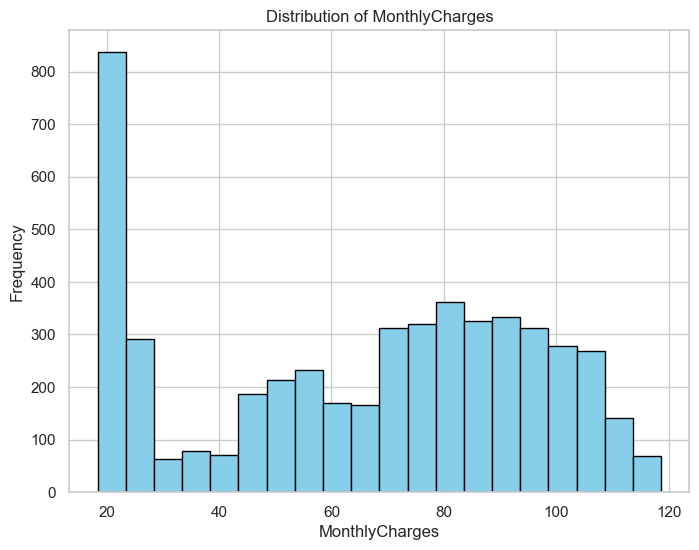

--- TotalCharges ---
Summary Statistics:
count    5034.000000
mean     2300.954758
std      2268.346402
min        18.799999
25%       417.662498
50%      1401.000000
75%      3860.599976
max      8670.100000
Name: TotalCharges, dtype: float64


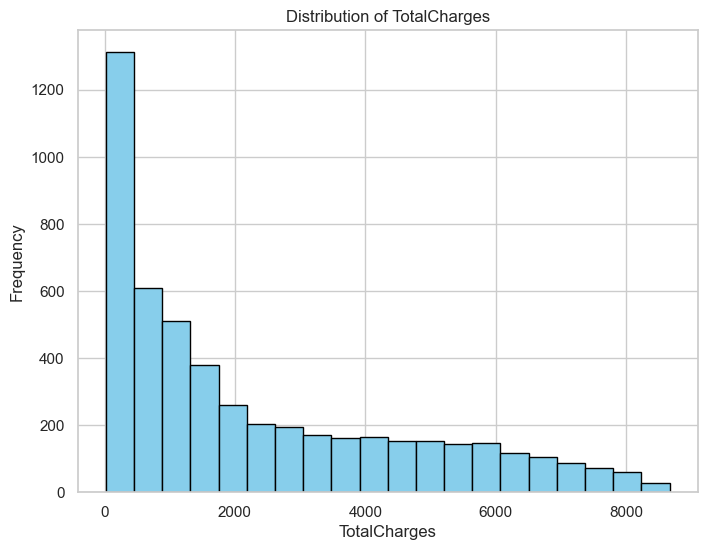

In [754]:

# Numeric variables (continuous)
numeric_variables = train_data.select_dtypes(include=['int64', 'float64'])
for column in numeric_variables:
    print(f"--- {column} ---")
    print("Summary Statistics:")
    print(train_data[column].describe())
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.hist(train_data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()



### Bivariate analysis

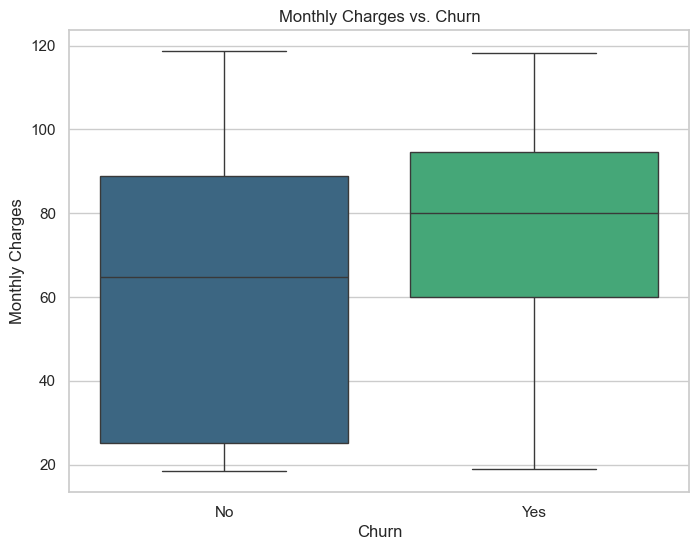

In [755]:
#Monthly charges vs churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_data, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

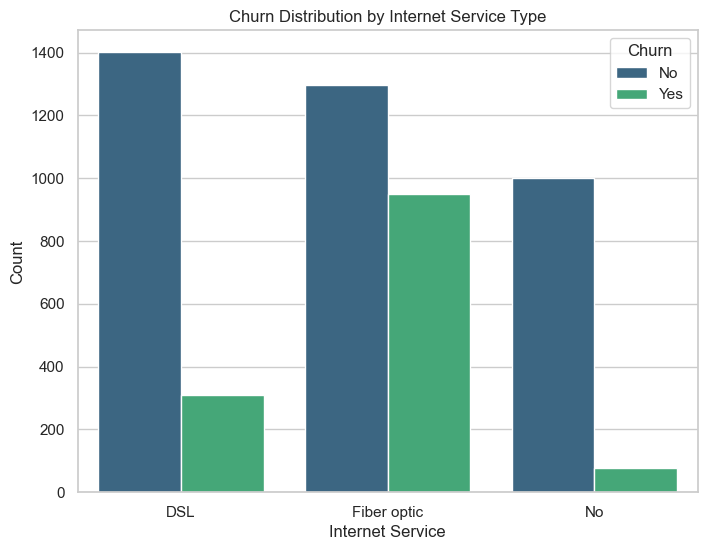

In [756]:
#internet service vs churn
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Distribution by Internet Service Type')
plt.legend(title='Churn', loc='upper right')
plt.show()


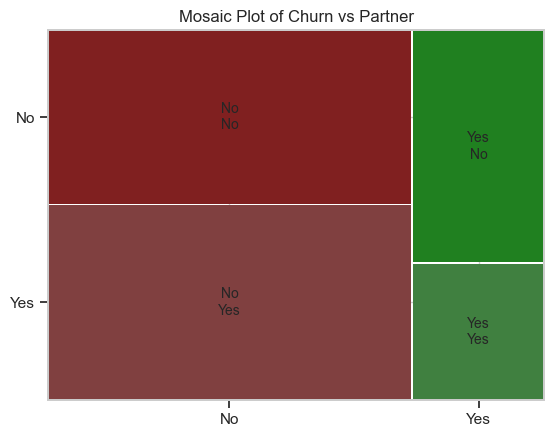

In [757]:
import statsmodels.graphics.mosaicplot as mplt

mplt.mosaic(train_data, ['Churn', 'Partner'], title='Mosaic Plot of Churn vs Partner')
plt.show()




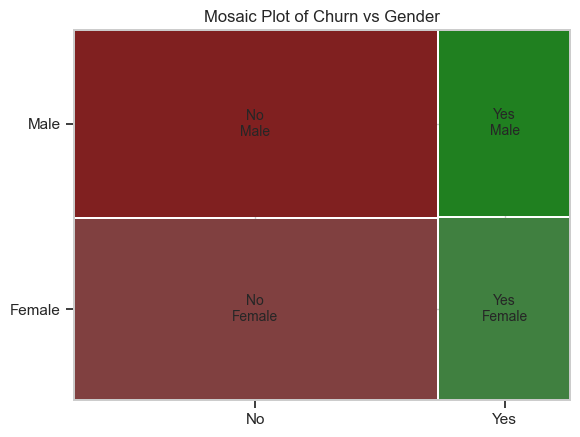

In [758]:


mplt.mosaic(train_data, ['Churn', 'gender'], title='Mosaic Plot of Churn vs Gender')
plt.show()

##### The churn rate is slightly higher for male customers compared to female customers. This implies that gender may have a minor influence on customer churn.

### Multivariate analysis

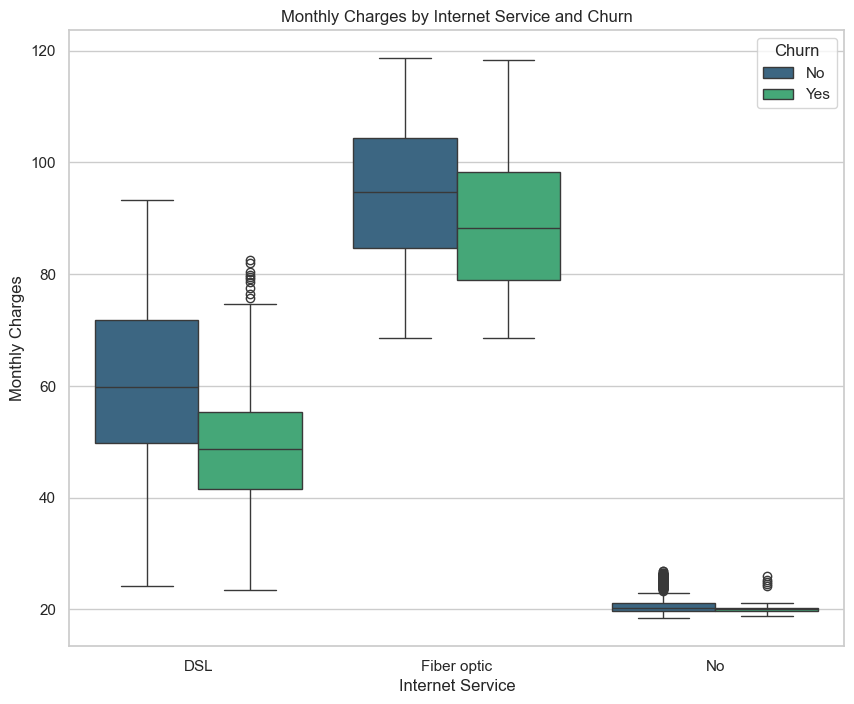

In [759]:

# Create box plots for numerical features by churn
plt.figure(figsize=(10, 8))
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Internet Service and Churn')
plt.show()


## Answering analytical questions

#### 1.     What is the total churn rate?

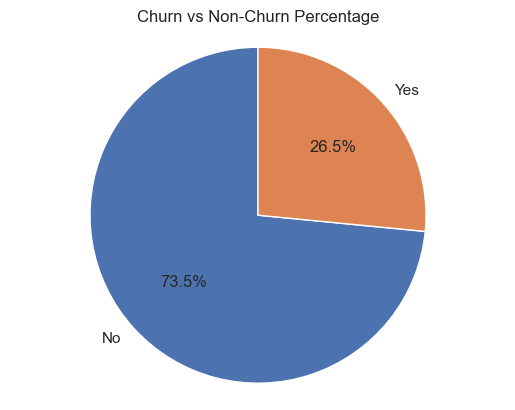

In [760]:
def calculate_churn_percentage(df, column_name):
    """
    Calculate the percentage of churn and non-churn in a specified column.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - column_name (str): The column name where churn data is stored.
    
    Returns:
    - dict: Dictionary containing the percentage of churn and non-churn.
    """
    # Calculate the frequency of each category in the specified column
    counts = df['Churn'].value_counts(normalize=True)
    
    # Convert the frequencies to percentage
    percentages = counts * 100
    
    return percentages

def plot_churn_pie_chart(percentages):
    """
    Plots a pie chart of churn and non-churn percentages.
    
    Parameters:
    - percentages (pd.Series): Series containing the percentages of churn and non-churn.
    """
    # Create a pie chart
    fig, ax = plt.subplots()
    ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Title
    plt.title('Churn vs Non-Churn Percentage')

    # Show the plot
    plt.show()

df = pd.DataFrame(train_data)

# Calculate churn and non-churn percentages
churn_percentages = calculate_churn_percentage(df, 'Churn')

# Plot the pie chart
plot_churn_pie_chart(churn_percentages)

2.How does the different boolean attributes affect the churn?
 

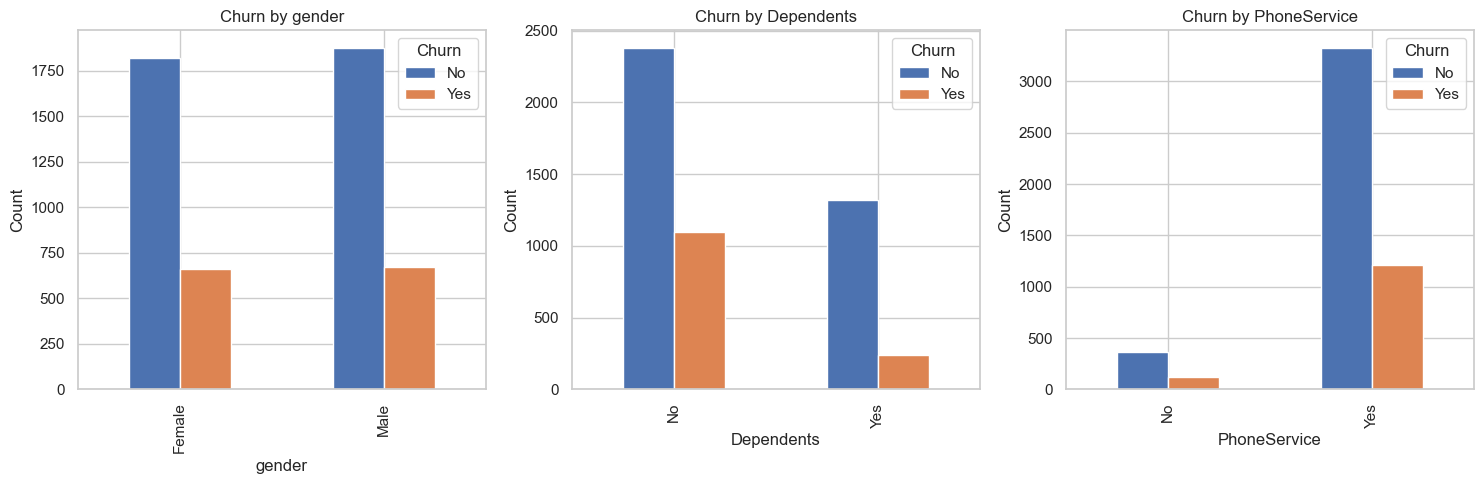

In [761]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for ax, feature in zip(axes, ['gender', 'Dependents', 'PhoneService']):
    df.groupby([feature, 'Churn']).size().unstack().plot(kind='bar', ax=ax, title=f'Churn by {feature}')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


   #### 3.How does the different non-boolean attributes affect the churn?

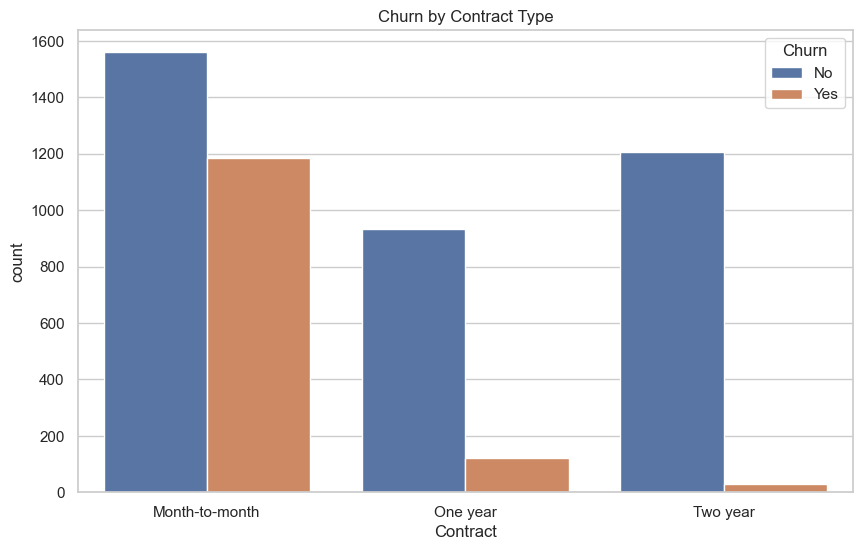

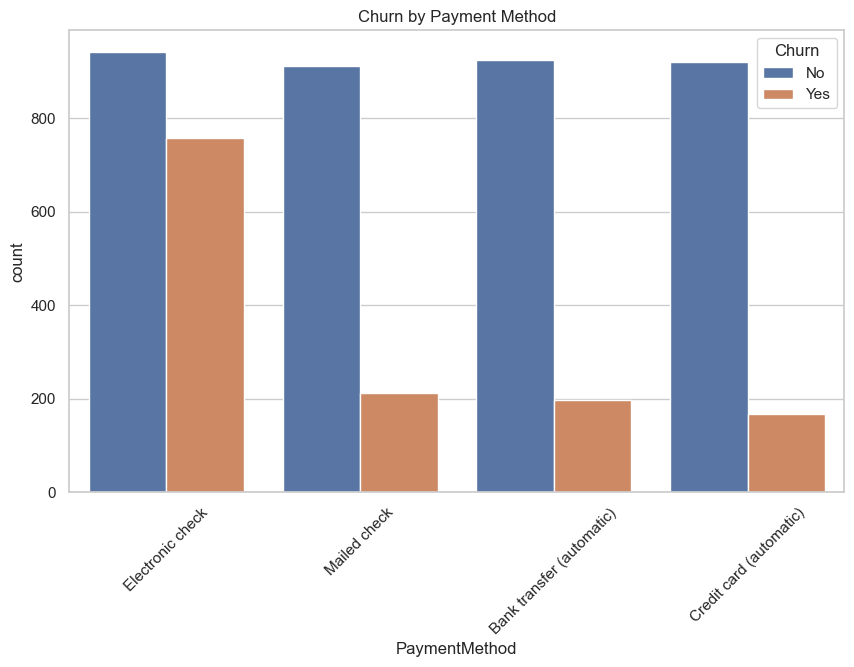

In [762]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the visualization environment
sns.set(style="whitegrid")

# Bar plot for Contract vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=train_data)
plt.title('Churn by Contract Type')
plt.show()

# Clustered bar plot for Payment Method vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=train_data)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


 #### 4.How does the different numerical attributes affect the churn?
   

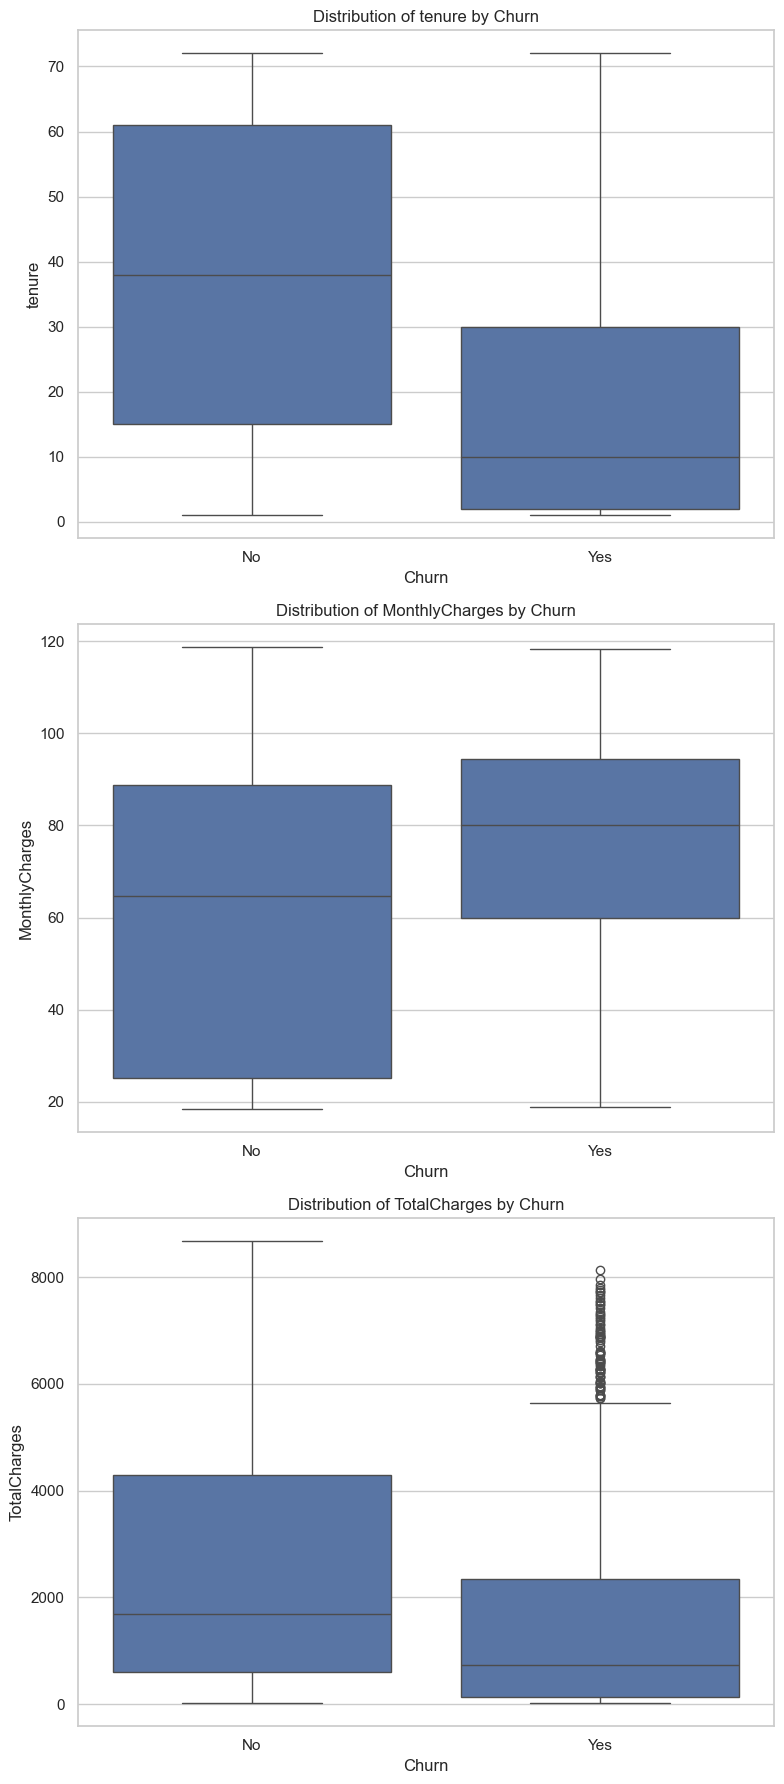

In [763]:
# List of numerical attributes (replace with your actual column names)
numerical_attributes = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Example attributes

# Create subplots for each numerical attribute
fig, axes = plt.subplots(nrows=len(numerical_attributes), ncols=1, figsize=(8, 6*len(numerical_attributes)))

# Iterate over each numerical attribute and create box plots
for i, attribute in enumerate(numerical_attributes):
    sns.boxplot(x='Churn', y=attribute, data=train_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {attribute} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(attribute)

plt.tight_layout()
plt.show()


 #### 5. How does tenure affect the churn?
  

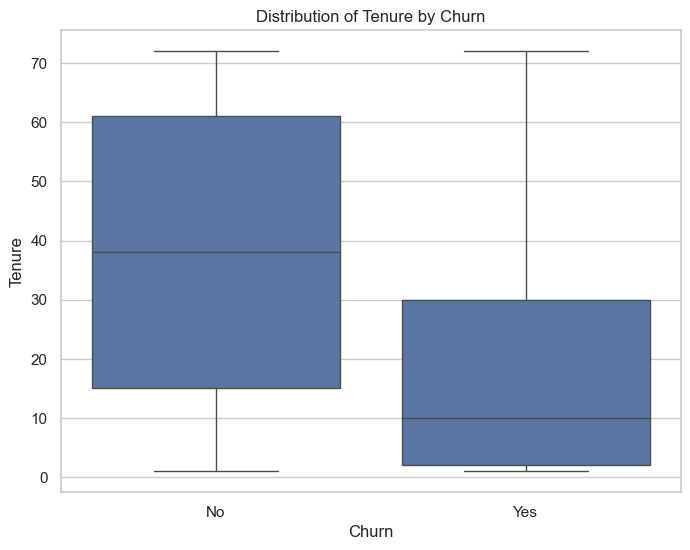

In [764]:


# Create a box plot to compare the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=train_data)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


  #### 6.How does the type of internet service affect churn?

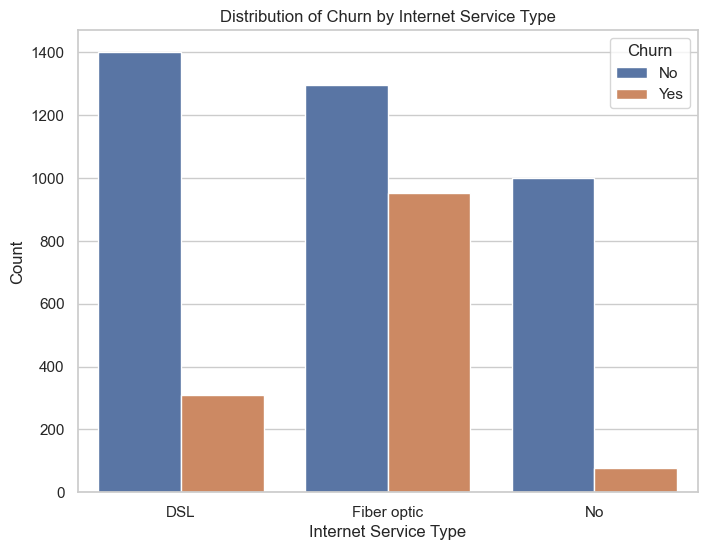

In [765]:

# Create a count plot to compare the distribution of churned and non-churned customers for each internet service type
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=train_data)
plt.title('Distribution of Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


#### 7. How does the type of contract affect the churn?

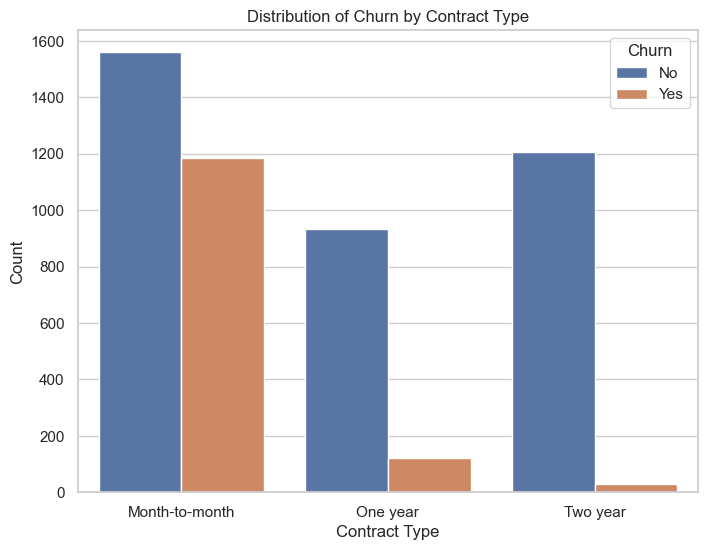

In [766]:


# Create a count plot to compare the distribution of churned and non-churned customers for each contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=train_data)
plt.title('Distribution of Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


#### 8.How does the type of payment method affect the churn?

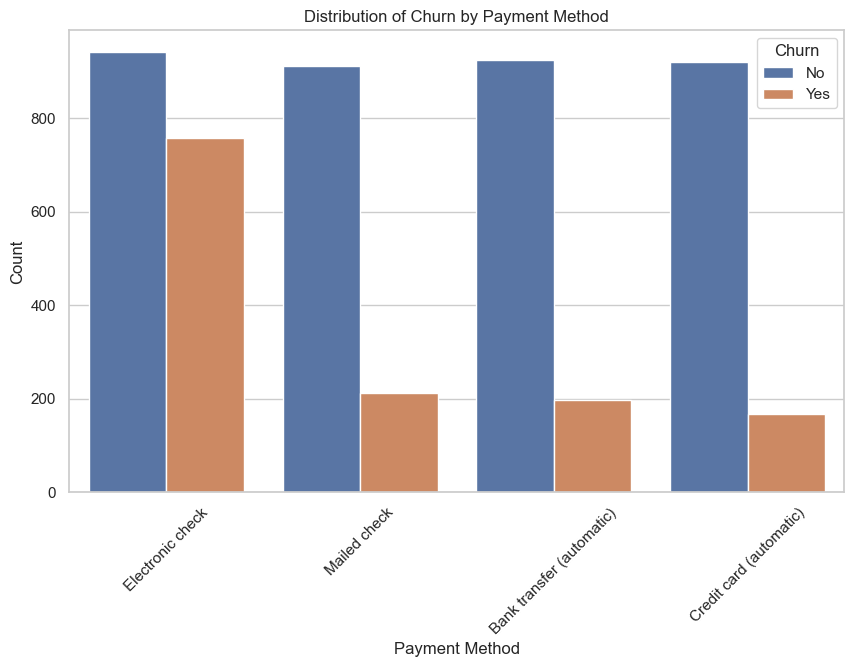

In [767]:
# Create a count plot to compare the distribution of churned and non-churned customers for each payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=train_data)
plt.title('Distribution of Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [768]:
#converting my train data to csv for my power BI visualization
train_data.to_csv('Churn_Train_Data.csv')

##### Hypothesis testing

In [769]:
import scipy.stats as stats

# Filter the dataset for churners and non-churners
churners = train_data[train_data['Churn'] == 'Yes']
non_churners = train_data[train_data['Churn'] =='No']

# Extract monthly charges for churners and non-churners
churner_monthly_charges = churners['MonthlyCharges']
non_churner_monthly_charges = non_churners['MonthlyCharges']

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(churner_monthly_charges, non_churner_monthly_charges)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determine significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in average monthly charges between churners and non-churners.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average monthly charges between churners and non-churners.")

T-statistic: 14.63042633194232
P-value: 1.678344901798023e-47
Reject null hypothesis: There is a significant difference in average monthly charges between churners and non-churners.


In [770]:
#Lets look at correlation between numeric values and target variable (Churn)
numeric_columns = train_data.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.239642,0.826188
MonthlyCharges,0.239642,1.000000,0.646813
TotalCharges,0.826188,0.646813,1.000000


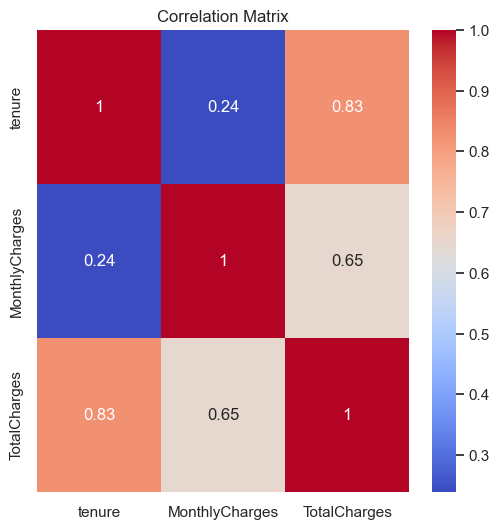

In [771]:
plt.figure(figsize=(6,6))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data preparation

#### Feature processing

In [772]:
# check unique values of each column
for column in train_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, train_data[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes' 'No phone service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']

In [773]:
from sklearn.metrics import mutual_info_score

# Lets find out feature dependency on the target variable using mutual information score:a measure of the mutual dependence between two random variables. In the context of machine learning and feature selection, mutual information score quantifies the amount of information obtained about one random variable through the other random variable.
x_cat = train_data.select_dtypes(include=object).drop('Churn', axis=1)
y_cat = train_data['Churn']

mi_scores = []

for column in x_cat.columns:
    mi_score = mutual_info_score(x_cat[column], y_cat)
    mi_scores.append((column, mi_score))

mi_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print(f"Feature: {feature}, Mutual Information Score: {score}")

Feature: Contract, Mutual Information Score: 0.10284790516675524
Feature: InternetService, Mutual Information Score: 0.05944428811167132
Feature: PaymentMethod, Mutual Information Score: 0.04163984913943765
Feature: TechSupport, Mutual Information Score: 0.030007109249305178
Feature: OnlineSecurity, Mutual Information Score: 0.029670157336360276
Feature: PaperlessBilling, Mutual Information Score: 0.019508874345666505
Feature: OnlineBackup, Mutual Information Score: 0.015826778687180174
Feature: Dependents, Mutual Information Score: 0.015615368107435551
Feature: DeviceProtection, Mutual Information Score: 0.013717699147021103
Feature: StreamingMovies, Mutual Information Score: 0.013349078621584257
Feature: SeniorCitizen, Mutual Information Score: 0.010389723457655958
Feature: Partner, Mutual Information Score: 0.010018147440621322
Feature: StreamingTV, Mutual Information Score: 0.009953736504141789
Feature: MultipleLines, Mutual Information Score: 0.0008281912846177519
Feature: PhoneSe

In [774]:
import nbformat

In [775]:
# drop columns
train_data.drop(columns=['gender','PhoneService', 'MultipleLines'], inplace=True)

In [776]:
# Create bins for Tenure column
# We do this to reduce data complexity and potentialy increase our model performance
def tenure (T):
    if T<=12:
        return 1
    elif T>12 and T<=24:
        return 2
    elif T>24 and T<=36:
        return 3
    elif T>36 and T<=48:
        return 4
    elif T>48 and T<=60:
        return 5
    else:
        return 6

train_data['Tenure_group'] = train_data['tenure'].apply(lambda x: tenure(x))

In [777]:
train_data['Tenure_group'].value_counts()

Tenure_group
1    1534
6    1016
2     732
3     603
5     590
4     559
Name: count, dtype: int64

In [778]:
# drop original tenure column
train_data.drop('tenure', axis = 1, inplace=True)

<Axes: xlabel='Tenure_group', ylabel='count'>

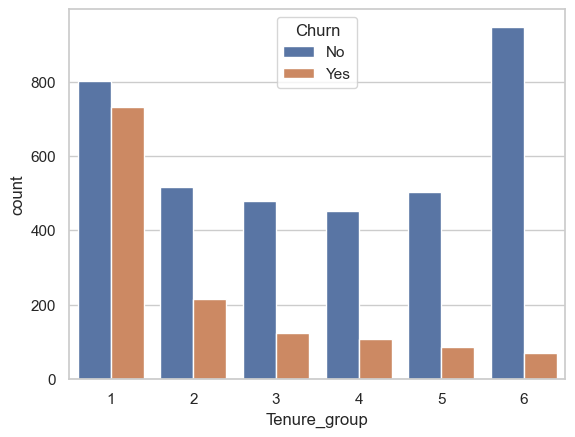

In [779]:
sns.countplot(x='Tenure_group', hue='Churn', data=train_data)

##### Check if dataset is balanced

In [780]:
train_data['Churn'].value_counts()

Churn
No     3698
Yes    1336
Name: count, dtype: int64

In [781]:
df_encode = train_data.copy()
df_encode.head()

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,1
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No,3
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,1
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,4
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,1


In [782]:
#split dataset into traiing and evaluation
X = train_data.drop('Churn', axis=1)
Y = train_data['Churn']


In [783]:
#label encoding
from sklearn.preprocessing import LabelEncoder

y = train_data['Churn']
# Encode the target variable (Churn) to have 0 or 1 instead of No or Yes
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

In [784]:
#feature encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# One hot encoding for categorical columns
categorical_columns = ['Tenure_group','SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create column transformer instance
transformer = make_column_transformer(
    (OneHotEncoder(), categorical_columns)
)

In [785]:

transformed_data = transformer.fit_transform(X[categorical_columns])

In [786]:
# Transforming back to a dataframe
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back
transformed_df.index = X.index
# Joining tables
X = pd.concat([X, transformed_df], axis=1)
# Dropping old categorical columns
X.drop(categorical_columns, axis=1, inplace=True)
X.head()

,MonthlyCharges,TotalCharges,onehotencoder__Tenure_group_1,onehotencoder__Tenure_group_2,onehotencoder__Tenure_group_3,onehotencoder__Tenure_group_4,onehotencoder__Tenure_group_5,onehotencoder__Tenure_group_6,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
0,29.850000,29.850000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,56.950001,1889.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,53.849998,108.150002,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,42.299999,1840.750000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,70.699997,151.649994,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [787]:

# let's check for missing values
X.isnull().sum()

MonthlyCharges                                            0
TotalCharges                                              0
onehotencoder__Tenure_group_1                             0
onehotencoder__Tenure_group_2                             0
onehotencoder__Tenure_group_3                             0
onehotencoder__Tenure_group_4                             0
onehotencoder__Tenure_group_5                             0
onehotencoder__Tenure_group_6                             0
onehotencoder__SeniorCitizen_0                            0
onehotencoder__SeniorCitizen_1                            0
onehotencoder__Partner_No                                 0
onehotencoder__Partner_Yes                                0
onehotencoder__Dependents_No                              0
onehotencoder__Dependents_Yes                             0
onehotencoder__InternetService_DSL                        0
onehotencoder__InternetService_Fiber optic                0
onehotencoder__InternetService_No       

In [788]:
#features scaling
from sklearn.preprocessing import StandardScaler

# standardization for numeric values
cols = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[cols])


In [789]:
# Create new DataFrames with the scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns=cols, index=X.index)
# Drop the original unscaled columns
X.drop(cols, axis=1, inplace=True)
# Concatenate the scaled columns with the original DataFrames
X = pd.concat([X, X_scaled_df], axis=1)

In [790]:

X.head()

,onehotencoder__Tenure_group_1,onehotencoder__Tenure_group_2,onehotencoder__Tenure_group_3,onehotencoder__Tenure_group_4,onehotencoder__Tenure_group_5,onehotencoder__Tenure_group_6,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,...,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.172700,-1.001315
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.271320,-0.181408
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.374430,-0.966794
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.758597,-0.202901
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.186022,-0.947615


#### Training dataset balancing using smote

In [791]:
# apply SMOTE to the training data (oversampling)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

In [792]:
from sklearn.model_selection import train_test_split

## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [793]:

# check shape after resampling
pd.DataFrame(X_train).shape, pd.DataFrame(y_train).shape

((5916, 44), (5916, 1))

In [794]:
# view class distribution
pd.value_counts(pd.Series(y_train))

0    2958
1    2958
Name: count, dtype: int64

### Observation
Our train data is now balanced

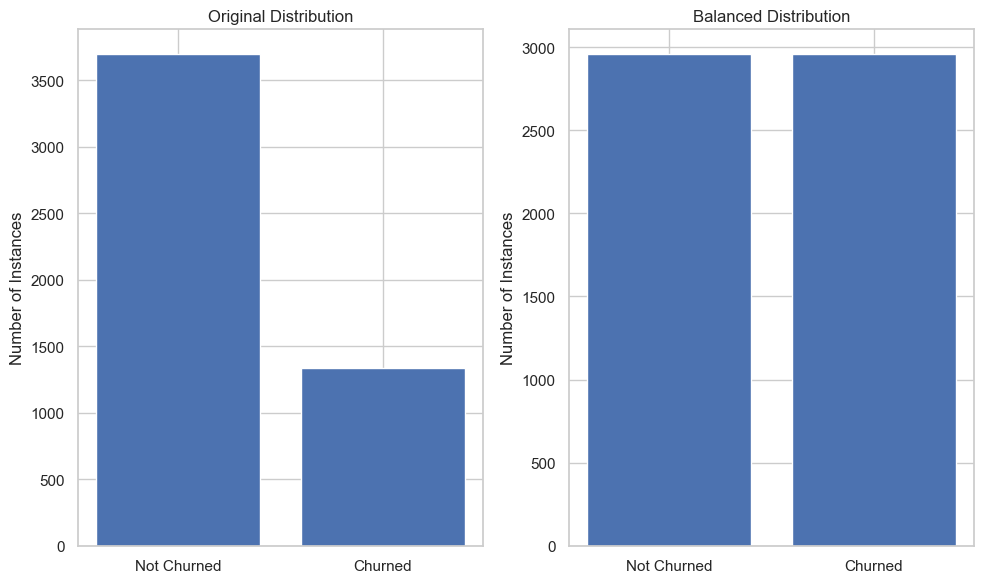

In [795]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
import numpy as np
# Plot the first bar graph for the original distribution
unique, counts = np.unique(y, return_counts=True)
axes[0].bar(unique, counts)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Churned', 'Churned'])
axes[0].set_ylabel('Number of Instances')
axes[0].set_title('Original Distribution')

# Plot the second bar graph for a separate y value
unique2, counts2 = np.unique(y_train, return_counts=True) 
axes[1].bar(unique2, counts2)
axes[1].set_xticks([0, 1])  # Adjust as needed
axes[1].set_xticklabels(['Not Churned', 'Churned'])  # Adjust labels
axes[1].set_ylabel('Number of Instances')
axes[1].set_title('Balanced Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

### ML Modelling